
# **<h1><center><span style="color:#3775a8"><u>SORBONNE DATA ANALYTICS : Le Datamanagement</u></span></center></h1>**
# **<span style="color:#3775a8">Analyse de l'avancement des projets de la verdures à Paris </span>**


# IMPORTATIONS DES BIBLIOTHEQUES 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder

# IMPORTATION DE LA DONNEE DU TRAITEMENT 

In [3]:
donnee=pd.read_csv(r"C:\Users\lenovo\Desktop\inscription_DU_sorbonne\SDA\projet regression\data_vert.csv",sep=";")

# TRANSFORMATION DE LA DONNEE

# convention     
> 1:Réalisé & Programmé

&nbsp;
> 0:  En cours d'études & En cours de substitution / En cours de validation

In [4]:
pd_1=donnee.replace(to_replace ="Réalisé",
                 value ="1")
pd_1
pd_2=pd_1.replace(to_replace ="Programmé",
                 value ="1")
pd_2
pd_3=pd_2.replace(to_replace ="-",
                 value ="0")
pd_3
pd_4=pd_3.replace(to_replace ="En cours d'études",
                 value ="0")
pd_4
df_5=pd_4.replace(to_replace ="En cours de substitution / En cours de validation",
                 value ="0")

In [5]:
df_5["Avancement du projet"].astype(int)

0       1
1       0
2       0
3       0
4       0
       ..
1600    0
1601    0
1602    0
1603    0
1604    0
Name: Avancement du projet, Length: 1605, dtype: int32

In [6]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Geo Point                                 1605 non-null   object 
 1   Geo Shape                                 1605 non-null   object 
 2   Arrondissement                            1605 non-null   float64
 3   Adresse                                   1599 non-null   object 
 4   Proposition non réalisable                1601 non-null   object 
 5   Type de végétalisation                    1602 non-null   object 
 6   Etat de la proposition                    1604 non-null   object 
 7   Numéro                                    1565 non-null   object 
 8   Commentaitre accompagnant la proposition  1603 non-null   object 
 9   Avancement du projet                      1605 non-null   object 
dtypes: float64(1), object(9)
memory usag

In [7]:
df_5.isnull().sum()

Geo Point                                    0
Geo Shape                                    0
Arrondissement                               0
Adresse                                      6
Proposition non réalisable                   4
Type de végétalisation                       3
Etat de la proposition                       1
Numéro                                      40
Commentaitre accompagnant la proposition     2
Avancement du projet                         0
dtype: int64

In [8]:
print(df_5.isnull().sum().sum())


56


In [9]:
df_5.drop_duplicates(inplace=True)
df_5

,Geo Point,Geo Shape,Arrondissement,Adresse,Proposition non réalisable,Type de végétalisation,Etat de la proposition,Numéro,Commentaitre accompagnant la proposition,Avancement du projet
0,"48.8795049968,2.31832699703","{""type"": ""Point"", ""coordinates"": [2.3183269970...",75008.0,rue corvetto,0,Pot ou bac à fleurs,proposition réalisable et retenue dans les 200...,S2014G3193,0,1
1,"48.8576089999,2.35143799978","{""type"": ""Point"", ""coordinates"": [2.3514379997...",75004.0,1 Rue du Renard,la proposition n'a pas été retenue car il exis...,Mur végétalisé,Propositions non réalisables techniquement,S2014H3595,Tonelle,0
2,"48.8598009996,2.3701900003","{""type"": ""Point"", ""coordinates"": [2.3701900002...",75011.0,2 Rue Pelée,la proposition n'a pas été retenue car elle co...,Jardinière en pleine terre,Propositions non réalisables techniquement,S2014G2801,Passage piéton mal aménagé pour passage pousse...,0
3,"48.8612499997,2.37004599938","{""type"": ""Point"", ""coordinates"": [2.3700459993...",75011.0,19 Rue Alphonse Baudin,la proposition n'a pas été retenue car le trot...,Mur végétalisé,Propositions non réalisables techniquement,S2014I4684,pas de commentaires,0
4,"48.8332590002,2.36236499951","{""type"": ""Point"", ""coordinates"": [2.3623649995...",75013.0,124 Boulevard Vincent Auriol,la proposition n'a pas été retenue car le trot...,Plantation d?arbre,Propositions non réalisables techniquement,S2014I1994,pas de commentaires,0
...,...,...,...,...,...,...,...,...,...,...
1600,"48.8288210003,2.35651000062","{""type"": ""Point"", ""coordinates"": [2.3565100006...",75013.0,21 Avenue d'Italie,0,Mur végétalisé,proposition réalisable techniquement mais non ...,S2014G4372,0,0
1601,"48.8615540004,2.40185999947","{""type"": ""Point"", ""coordinates"": [2.4018599994...",75020.0,18 Rue Stendhal,la proposition n'a pas été retenue car elle co...,Mur végétalisé,Propositions non réalisables techniquement,S2014I5143,mur qui donne sur la réserve d'eau de la rue s...,0
1602,"48.872555,2.36134700044","{""type"": ""Point"", ""coordinates"": [2.3613470004...",75010.0,5-7 Rue Legouvé,0,Mur végétalisé,proposition réalisable techniquement mais non ...,S2014G3619,0,0
1603,"48.846615,2.39350500014","{""type"": ""Point"", ""coordinates"": [2.3935050001...",75012.0,Rue Marie Benoist,0,Pot ou bac à fleurs,proposition réalisable techniquement mais non ...,S2014H177,0,0


In [10]:
df_6=pd.get_dummies(df_5, columns=["Etat de la proposition"])
df_6
df_7=pd.get_dummies(df_5, columns=["Proposition non réalisable"])
df_7
df_7.set_index("Avancement du projet")
df_7
df_8=df_7.drop(columns=["Type de végétalisation","Numéro","Commentaitre accompagnant la proposition","Proposition non réalisable_0","Etat de la proposition"], inplace=True)
df_7.drop(columns=["Adresse"],inplace=True)
df_7

,Geo Point,Geo Shape,Arrondissement,Avancement du projet,"Proposition non réalisable_La végétalisation proposée (plantation d'arbres, jardinières, ...) est déjà présente à l'emplacement proposé","Proposition non réalisable_l'absence de commentaires ou de photos, ou de précisions suffisantes, n'ont pas permis aux services de caractériser le type de végétalisation souhaité ou un emplacement suffisament précis",Proposition non réalisable_la proposition n'a pas été retenue car aucun mur susceptible de servir de support à de la végétation n'a été trouvé à l'adresse indiquée,"Proposition non réalisable_la proposition n'a pas été retenue car elle concerne une toiture et ne rentre donc pas dans le cadre de l'opération Du Vert près de Chez Moi, qui vise à verdir l'espace public",Proposition non réalisable_la proposition n'a pas été retenue car elle concerne une zone non accessible depuis l'espace public,Proposition non réalisable_la proposition n'a pas été retenue car elle concerne une zone située en dehors du domaine public géré par la Ville de Paris,...,"Proposition non réalisable_la proposition n'a pas été retenue car peu compatible avec la circulation des piétons (forte fréquentation, piétinement, gêne) ou aggraverait l'encombrement de l'espace public concerné",Proposition non réalisable_la proposition n'a pas été retenue du fait d'un support incompatible avec la mise en place de végétation,Proposition non réalisable_la proposition n'a pas été retenue du fait de la présence de réseaux enterrés incompatibles avec la plantation de végétaux,Proposition non réalisable_la proposition n'a pas été retenue du fait des protections patrimoniales propres au site proposé limitant les réalisations possibles,Proposition non réalisable_la proposition n'a pas été retenue du fait du caractère sensible du site proposé,"Proposition non réalisable_la proposition n'a pas été retenue à cause du manque de luminosité du site proposé, incompatible avec le développement de la végétation",Proposition non réalisable_la proposition n'a pas été retenue à cause du revêtement de l'entourage d'arbre incompatible avec la plantation de végétaux ou du risque de piétinement importants,Proposition non réalisable_la proposition ne rentre pas dans le cadre de l'opération Du Vert Près de Chez Moi car elle est sans rapport avec une végétalisation de proximité sur l'espace public,Proposition non réalisable_pas d'arbre à cette adresse,Proposition non réalisable_une proposition similaire a déjà été proposée et a été retenue. Le projet est à l'étude.
0,"48.8795049968,2.31832699703","{""type"": ""Point"", ""coordinates"": [2.3183269970...",75008.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"48.8576089999,2.35143799978","{""type"": ""Point"", ""coordinates"": [2.3514379997...",75004.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"48.8598009996,2.3701900003","{""type"": ""Point"", ""coordinates"": [2.3701900002...",75011.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"48.8612499997,2.37004599938","{""type"": ""Point"", ""coordinates"": [2.3700459993...",75011.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"48.8332590002,2.36236499951","{""type"": ""Point"", ""coordinates"": [2.3623649995...",75013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,"48.8288210003,2.35651000062","{""type"": ""Point"", ""coordinates"": [2.3565100006...",75013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1601,"48.8615540004,2.40185999947","{""type"": ""Point"", ""coordinates"": [2.4018599994...",75020.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1602,"48.872555,2.36134700044","{""type"": ""Point"", ""coordinates"": [2.3613470004...",75010.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1603,"48.846615,2.39350500014","{""type"": ""Point"", ""coordinates"": [2.3935050001...",75012.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_7.set_index("Avancement du projet")

,Geo Point,Geo Shape,Arrondissement,"Proposition non réalisable_La végétalisation proposée (plantation d'arbres, jardinières, ...) est déjà présente à l'emplacement proposé","Proposition non réalisable_l'absence de commentaires ou de photos, ou de précisions suffisantes, n'ont pas permis aux services de caractériser le type de végétalisation souhaité ou un emplacement suffisament précis",Proposition non réalisable_la proposition n'a pas été retenue car aucun mur susceptible de servir de support à de la végétation n'a été trouvé à l'adresse indiquée,"Proposition non réalisable_la proposition n'a pas été retenue car elle concerne une toiture et ne rentre donc pas dans le cadre de l'opération Du Vert près de Chez Moi, qui vise à verdir l'espace public",Proposition non réalisable_la proposition n'a pas été retenue car elle concerne une zone non accessible depuis l'espace public,Proposition non réalisable_la proposition n'a pas été retenue car elle concerne une zone située en dehors du domaine public géré par la Ville de Paris,"Proposition non réalisable_la proposition n'a pas été retenue car elle correspond à un opération de plus grande ampleur, incluant potentiellement des travaux relativement conséquents, allant au-delà de cet appel à propositions qui vise à développer une végétalisation de",...,"Proposition non réalisable_la proposition n'a pas été retenue car peu compatible avec la circulation des piétons (forte fréquentation, piétinement, gêne) ou aggraverait l'encombrement de l'espace public concerné",Proposition non réalisable_la proposition n'a pas été retenue du fait d'un support incompatible avec la mise en place de végétation,Proposition non réalisable_la proposition n'a pas été retenue du fait de la présence de réseaux enterrés incompatibles avec la plantation de végétaux,Proposition non réalisable_la proposition n'a pas été retenue du fait des protections patrimoniales propres au site proposé limitant les réalisations possibles,Proposition non réalisable_la proposition n'a pas été retenue du fait du caractère sensible du site proposé,"Proposition non réalisable_la proposition n'a pas été retenue à cause du manque de luminosité du site proposé, incompatible avec le développement de la végétation",Proposition non réalisable_la proposition n'a pas été retenue à cause du revêtement de l'entourage d'arbre incompatible avec la plantation de végétaux ou du risque de piétinement importants,Proposition non réalisable_la proposition ne rentre pas dans le cadre de l'opération Du Vert Près de Chez Moi car elle est sans rapport avec une végétalisation de proximité sur l'espace public,Proposition non réalisable_pas d'arbre à cette adresse,Proposition non réalisable_une proposition similaire a déjà été proposée et a été retenue. Le projet est à l'étude.
Avancement du projet,,,,,,,,,,,,,,,,,,,,,
1,"48.8795049968,2.31832699703","{""type"": ""Point"", ""coordinates"": [2.3183269970...",75008.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.8576089999,2.35143799978","{""type"": ""Point"", ""coordinates"": [2.3514379997...",75004.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.8598009996,2.3701900003","{""type"": ""Point"", ""coordinates"": [2.3701900002...",75011.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0,"48.8612499997,2.37004599938","{""type"": ""Point"", ""coordinates"": [2.3700459993...",75011.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.8332590002,2.36236499951","{""type"": ""Point"", ""coordinates"": [2.3623649995...",75013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"48.8288210003,2.35651000062","{""type"": ""Point"", ""coordinates"": [2.3565100006...",75013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.8615540004,2.40185999947","{""type"": ""Point"", ""coordinates"": [2.4018599994...",75020.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.872555,2.36134700044","{""type"": ""Point"", ""coordinates"": [2.3613470004...",75010.0,0,0,0,0,0,0,0,...,0,0,0,0,0

In [12]:
df_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605 entries, 0 to 1604
Data columns (total 28 columns):
 #   Column                                                                                                                                                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                          --------------  -----  
 0   Geo Point                                                                                                                                                                                                                                                                       1605 non-null 

In [13]:
df_7.rename(columns={  "Proposition non réalisable_La végétalisation proposée (plantation d'arbres, jardinières, ...) est déjà présente à l'emplacement proposé": 'col_3'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_l'absence de commentaires ou de photos, ou de précisions suffisantes, n'ont pas permis aux services de caractériser le type de végétalisation souhaité ou un emplacement suffisament précis": 'col_4'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue car aucun mur susceptible de servir de support à de la végétation n'a été trouvé à l'adresse indiquée": 'col_5'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue car elle concerne une toiture et ne rentre donc pas dans le cadre de l'opération Du Vert près de Chez Moi, qui vise à verdir l'espace public": 'col_6'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue car elle concerne une zone non accessible depuis l'espace public": 'col_7'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue car elle concerne une zone située en dehors du domaine public géré par la Ville de Paris": 'col_8'}, inplace=True)
df_7
df_7.rename(columns={"roposition non réalisable_la propoPsition n'a pas été retenue car elle correspond à un opération de plus grande ampleur, incluant potentiellement des travaux relativement conséquents, allant au-delà de cet appel à propositions qui vise à développer une végétalisation de": 'col_9'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue car elle faisait état d'un dysfonctionnement de l'espace public, et ne rentrait pas dans le cadre de l'opération Du Vert Près de Chez Moi": 'col_10'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue car elle remet en cause un aménagement réalisé récemment ou prévu prochainement": 'col_11'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue car il existe des vitrines à proximité, pour lesquelles elle aurait constitué une gêne visuelle": 'col_12'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue car l'espace n'est pas suffisant": 'col_13'}, inplace=True)
df_7
df_7.rename(columns={" Proposition non réalisable_la proposition n'a pas été retenue car l'espace n'est pas suffisant. En revanche, le mur situé au 42 rue des Bois est retenu dans le cadre de l'opération Du Vert Près de Chez Moi.": 'col_14'}, inplace=True)
df_7
df_7.rename(columns={" Proposition non réalisable_la proposition n'a pas été retenue car le mur proposé est apparu inadéquat ou en mauvais état": 'col_15'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue car le trottoir est trop étroit ": 'col_16'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue car peu compatible avec la circulation des piétons (forte fréquentation, piétinement, gêne) ou aggraverait l'encombrement de l'espace public concerné": 'col_17'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue du fait d'un support incompatible avec la mise en place de végétation": 'col_18'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue du fait de la présence de réseaux enterrés incompatibles avec la plantation de végétaux": 'col_19'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue du fait des protections patrimoniales propres au site proposé limitant les réalisations possibles": 'col_20'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue du fait du caractère sensible du site proposé": 'col_21'},
            inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue à cause du manque de luminosité du site proposé, incompatible avec le développement de la végétation": 'col_22'},
            inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition n'a pas été retenue à cause du revêtement de l'entourage d'arbre incompatible avec la plantation de végétaux ou du risque de piétinement importants": 'col_23'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_la proposition ne rentre pas dans le cadre de l'opération Du Vert Près de Chez Moi car elle est sans rapport avec une végétalisation de proximité sur l'espace public": 'col_24'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_pas d'arbre à cette adresse": 'col_25'}, inplace=True)
df_7
df_7.rename(columns={"Proposition non réalisable_une proposition similaire a déjà été proposée et a été retenue. Le projet est à l'étude.": 'col_26'}, inplace=True)
df_7


,Geo Point,Geo Shape,Arrondissement,Avancement du projet,col_3,col_4,col_5,col_6,col_7,col_8,...,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26
0,"48.8795049968,2.31832699703","{""type"": ""Point"", ""coordinates"": [2.3183269970...",75008.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"48.8576089999,2.35143799978","{""type"": ""Point"", ""coordinates"": [2.3514379997...",75004.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"48.8598009996,2.3701900003","{""type"": ""Point"", ""coordinates"": [2.3701900002...",75011.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"48.8612499997,2.37004599938","{""type"": ""Point"", ""coordinates"": [2.3700459993...",75011.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"48.8332590002,2.36236499951","{""type"": ""Point"", ""coordinates"": [2.3623649995...",75013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,"48.8288210003,2.35651000062","{""type"": ""Point"", ""coordinates"": [2.3565100006...",75013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1601,"48.8615540004,2.40185999947","{""type"": ""Point"", ""coordinates"": [2.4018599994...",75020.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1602,"48.872555,2.36134700044","{""type"": ""Point"", ""coordinates"": [2.3613470004...",75010.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1603,"48.846615,2.39350500014","{""type"": ""Point"", ""coordinates"": [2.3935050001...",75012.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_7.set_index("Avancement du projet")

,Geo Point,Geo Shape,Arrondissement,col_3,col_4,col_5,col_6,col_7,col_8,"Proposition non réalisable_la proposition n'a pas été retenue car elle correspond à un opération de plus grande ampleur, incluant potentiellement des travaux relativement conséquents, allant au-delà de cet appel à propositions qui vise à développer une végétalisation de",...,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26
Avancement du projet,,,,,,,,,,,,,,,,,,,,,
1,"48.8795049968,2.31832699703","{""type"": ""Point"", ""coordinates"": [2.3183269970...",75008.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.8576089999,2.35143799978","{""type"": ""Point"", ""coordinates"": [2.3514379997...",75004.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.8598009996,2.3701900003","{""type"": ""Point"", ""coordinates"": [2.3701900002...",75011.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0,"48.8612499997,2.37004599938","{""type"": ""Point"", ""coordinates"": [2.3700459993...",75011.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.8332590002,2.36236499951","{""type"": ""Point"", ""coordinates"": [2.3623649995...",75013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"48.8288210003,2.35651000062","{""type"": ""Point"", ""coordinates"": [2.3565100006...",75013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.8615540004,2.40185999947","{""type"": ""Point"", ""coordinates"": [2.4018599994...",75020.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.872555,2.36134700044","{""type"": ""Point"", ""coordinates"": [2.3613470004...",75010.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
statistiques_descreptives=df_7.describe()
statistiques_descreptives
print(df_7.columns.values)

['Geo Point' 'Geo Shape' 'Arrondissement' 'Avancement du projet' 'col_3'
 'col_4' 'col_5' 'col_6' 'col_7' 'col_8'
 "Proposition non réalisable_la proposition n'a pas été retenue car elle correspond à un opération de plus grande ampleur, incluant potentiellement des travaux relativement conséquents, allant au-delà de cet appel à propositions qui vise à développer une végétalisation de"
 'col_10' 'col_11' 'col_12' 'col_13'
 "Proposition non réalisable_la proposition n'a pas été retenue car l'espace n'est pas suffisant. En revanche, le mur situé au 42 rue des Bois est retenu dans le cadre de l'opération Du Vert Près de Chez Moi."
 "Proposition non réalisable_la proposition n'a pas été retenue car le mur proposé est apparu inadéquat ou en mauvais état"
 "Proposition non réalisable_la proposition n'a pas été retenue car le trottoir est trop étroit"
 'col_17' 'col_18' 'col_19' 'col_20' 'col_21' 'col_22' 'col_23' 'col_24'
 'col_25' 'col_26']


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    1476
1     129
Name: Avancement du projet, dtype: int64

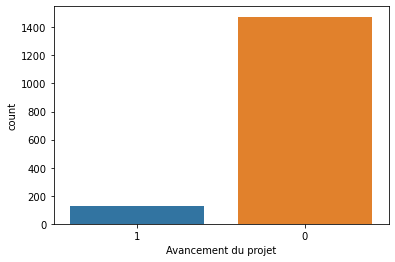

In [16]:
sns.countplot('Avancement du projet',data=df_7)
df_7['Avancement du projet'].value_counts()

In [17]:
df_7['Avancement du projet'].describe()

count     1605
unique       2
top          0
freq      1476
Name: Avancement du projet, dtype: object

In [18]:
df_7['Avancement du projet']

0       1
1       0
2       0
3       0
4       0
       ..
1600    0
1601    0
1602    0
1603    0
1604    0
Name: Avancement du projet, Length: 1605, dtype: object

In [25]:
df_7["Avancement du projet"].astype(int)

0       1
1       0
2       0
3       0
4       0
       ..
1600    0
1601    0
1602    0
1603    0
1604    0
Name: Avancement du projet, Length: 1605, dtype: int32

In [47]:
list(df_7.columns)

['Geo Point',
 'Geo Shape',
 'Arrondissement',
 'Avancement du projet',
 'col_3',
 'col_4',
 'col_5',
 'col_6',
 'col_7',
 'col_8',
 "Proposition non réalisable_la proposition n'a pas été retenue car elle correspond à un opération de plus grande ampleur, incluant potentiellement des travaux relativement conséquents, allant au-delà de cet appel à propositions qui vise à développer une végétalisation de",
 'col_10',
 'col_11',
 'col_12',
 'col_13',
 "Proposition non réalisable_la proposition n'a pas été retenue car l'espace n'est pas suffisant. En revanche, le mur situé au 42 rue des Bois est retenu dans le cadre de l'opération Du Vert Près de Chez Moi.",
 "Proposition non réalisable_la proposition n'a pas été retenue car le mur proposé est apparu inadéquat ou en mauvais état",
 "Proposition non réalisable_la proposition n'a pas été retenue car le trottoir est trop étroit",
 'col_17',
 'col_18',
 'col_19',
 'col_20',
 'col_21',
 'col_22',
 'col_23',
 'col_24',
 'col_25',
 'col_26']

In [50]:
df_7.set_index("Avancement du projet")

,Geo Point,Geo Shape,Arrondissement,col_3,col_4,col_5,col_6,col_7,col_8,"Proposition non réalisable_la proposition n'a pas été retenue car elle correspond à un opération de plus grande ampleur, incluant potentiellement des travaux relativement conséquents, allant au-delà de cet appel à propositions qui vise à développer une végétalisation de",...,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26
Avancement du projet,,,,,,,,,,,,,,,,,,,,,
1,"48.8795049968,2.31832699703","{""type"": ""Point"", ""coordinates"": [2.3183269970...",75008.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.8576089999,2.35143799978","{""type"": ""Point"", ""coordinates"": [2.3514379997...",75004.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.8598009996,2.3701900003","{""type"": ""Point"", ""coordinates"": [2.3701900002...",75011.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
0,"48.8612499997,2.37004599938","{""type"": ""Point"", ""coordinates"": [2.3700459993...",75011.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.8332590002,2.36236499951","{""type"": ""Point"", ""coordinates"": [2.3623649995...",75013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,"48.8288210003,2.35651000062","{""type"": ""Point"", ""coordinates"": [2.3565100006...",75013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.8615540004,2.40185999947","{""type"": ""Point"", ""coordinates"": [2.4018599994...",75020.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
0,"48.872555,2.36134700044","{""type"": ""Point"", ""coordinates"": [2.3613470004...",75010.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='col_8', ylabel='count'>

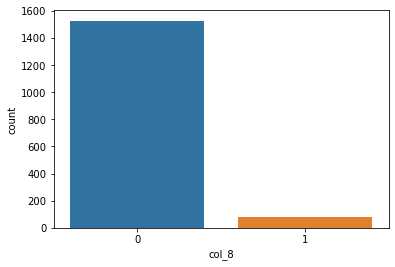

In [51]:
sns.countplot('col_8',data=df_7)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='col_22', ylabel='count'>

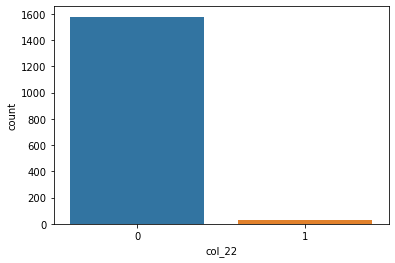

In [27]:
sns.countplot('col_22',data=df_7)

In [53]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X = df_7[['col_3',
 'col_4',
 'col_5',
 'col_6',
 'col_7',
 'col_8',
 
 'col_10',
 'col_11',
 'col_12',
 'col_13',
 "Proposition non réalisable_la proposition n'a pas été retenue car l'espace n'est pas suffisant. En revanche, le mur situé au 42 rue des Bois est retenu dans le cadre de l'opération Du Vert Près de Chez Moi.",
 "Proposition non réalisable_la proposition n'a pas été retenue car le mur proposé est apparu inadéquat ou en mauvais état",
 "Proposition non réalisable_la proposition n'a pas été retenue car le trottoir est trop étroit",
 'col_17',
 'col_18',
 'col_19',
 'col_20',
 'col_21',
 'col_22',
 'col_23',
 'col_24',
 'col_25',
 'col_26']]
y = df_7[['Avancement du projet']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [55]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [56]:
#Prediction of test set
y_pred = lr_model.predict(X_test)
#Predicted values
y_pred

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       297
           1       0.00      0.00      0.00        24

    accuracy                           0.93       321
   macro avg       0.46      0.50      0.48       321
weighted avg       0.86      0.93      0.89       321



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


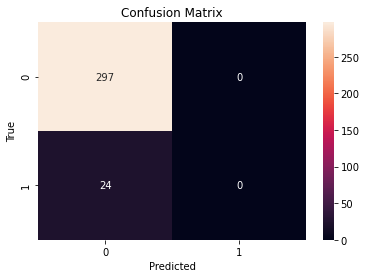

In [57]:
#Confusion matrix and classification report
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
print(classification_report(y_test, y_pred))